In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median,mean,stdev
from scipy.stats import kurtosis, skew
from math import sqrt, ceil
np.seterr(under='ignore')
np.seterr(over='ignore')

from fitter import Fitter

%run ../funtion/Funciones.ipynb
%run ../funtion/powerlaw_psd_gaussian.ipynb

# Exercicio 4
# Espaço de Cullen-Frey e Distribuições de Probabilidades

# Noise

In [25]:
serie_128 = np.zeros([128,1])
for i in range(128):
    serie_128 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(128/12) * np.sqrt(1 / 128)).cumsum())
    
serie_512 = np.zeros([512,1])
for i in range(512):
    serie_512 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(512/12) * np.sqrt(1 / 512)).cumsum())
    
serie_2048 = np.zeros([2048,1])
for i in range(2048):
    serie_2048 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(2048/12) * np.sqrt(1 / 2048)).cumsum())

serie_8192 = np.zeros([8192,10])
for i in range(8192):
    serie_8192 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(8192/12) * np.sqrt(1 / 8192)).cumsum())

serie_128_norm,serie_128_esta = Normalizar2(serie_128)
serie_512_norm,serie_512_esta = Normalizar2(serie_512)
serie_2048_norm,serie_2048_esta = Normalizar2(serie_2048)
serie_8192_norm,serie_8192_esta = Normalizar2(serie_8192)

serie_128_list = list(serie_128_norm) 
serie_512_list = list(serie_512_norm) 
serie_2048_list = list(serie_2048_norm) 
serie_8192_list = list(serie_8192_norm) 

# Color Noise

In [3]:
white_noise = np.zeros([8192])
pink_noise = np.zeros([8192])
red_noise = np.zeros([8192])

white_noise = powerlaw_psd_gaussian(0,8192)
pink_noise = powerlaw_psd_gaussian(1,8192)
red_noise = powerlaw_psd_gaussian(2,8192)
    
white_norm,white_esta = Normalizar2(white_noise)
pink_norm,pink_esta = Normalizar2(pink_noise)
red_norm,red_esta = Normalizar2(red_noise)

white_norm_list = list(white_norm)
pink_norm_list = list(pink_norm)
red_norm_list = list(red_norm)

# Pm Noise

In [4]:
x1,Endogenous = pmodel (8192,0.35,0.4)
x2,Exogenous = pmodel (8192,0.28,0.7)

Endogenous_norm,Endogenous_esta = Normalizar2(Endogenous)
Exogenous_norm,Exogenous_esta = Normalizar2(Exogenous)

Endogenous_list = list(Endogenous_norm)
Exogenous_list = list(Exogenous_norm)

# Resultados

## Ruidos de Sinais Estocásticos
### Noise 128

<Figure size 4400x4000 with 0 Axes>

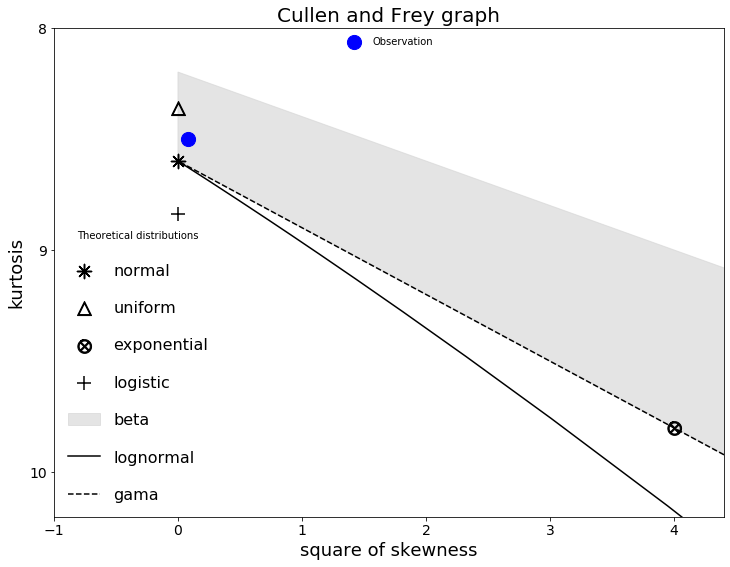

In [28]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(serie_128_list)

### Noise 512

<Figure size 4400x4000 with 0 Axes>

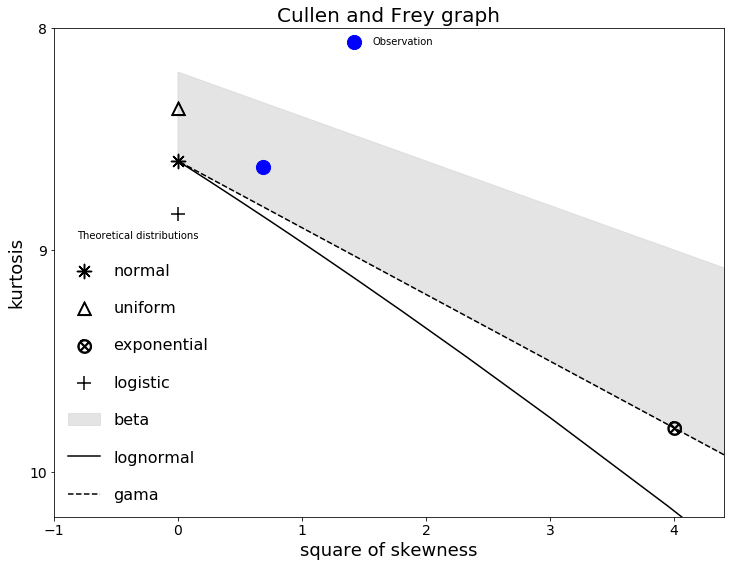

In [29]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(serie_512_list)

### Noise 2048

<Figure size 4400x4000 with 0 Axes>

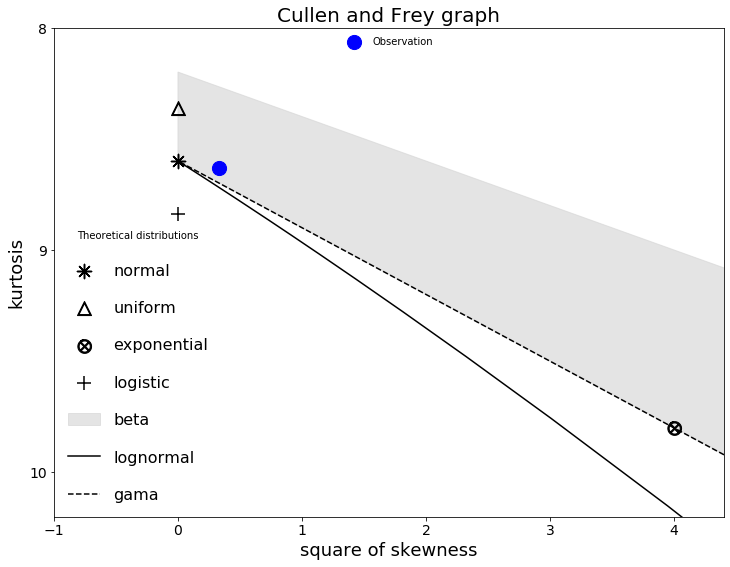

In [30]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(serie_2048_list)

### Noise 8192

<Figure size 4400x4000 with 0 Axes>

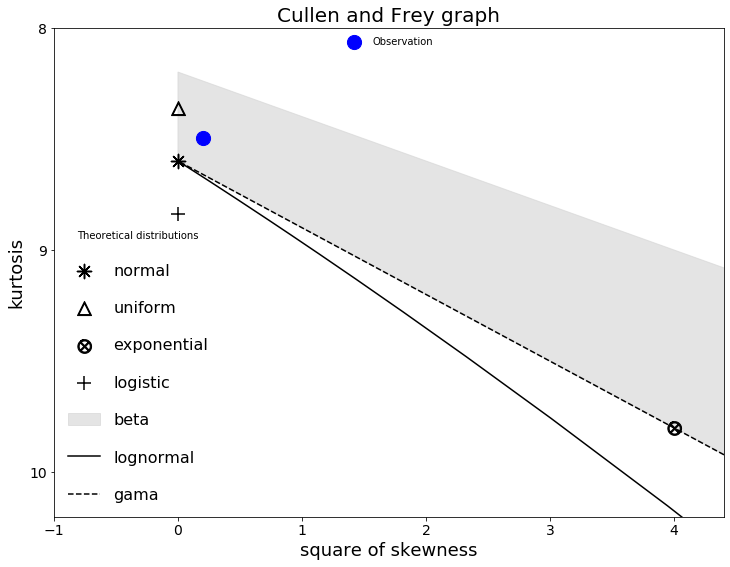

In [33]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(serie_8192_list)

### De acordo com o diagrama de Cullen e Frey, ambas distribuiçoes de ruído pm são encontradas dentro da area de uma distribuição do tipo beta.

## Color Noise
### White Noise

<Figure size 4400x4000 with 0 Axes>

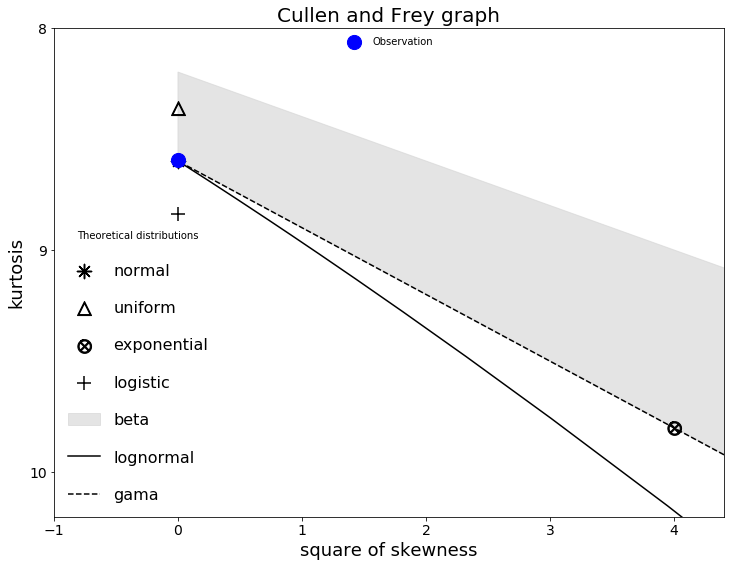

In [47]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(white_norm_list)

### Pink Noise

<Figure size 4400x4000 with 0 Axes>

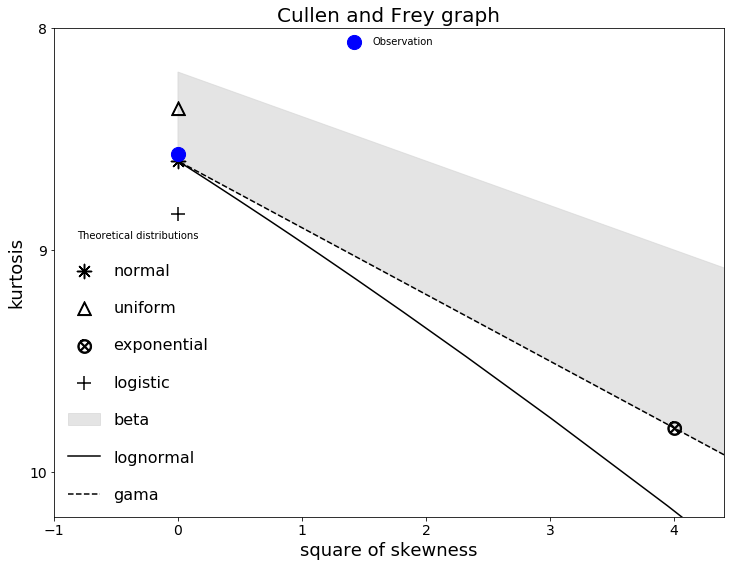

In [48]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(pink_norm_list)

### Red Noise

<Figure size 4400x4000 with 0 Axes>

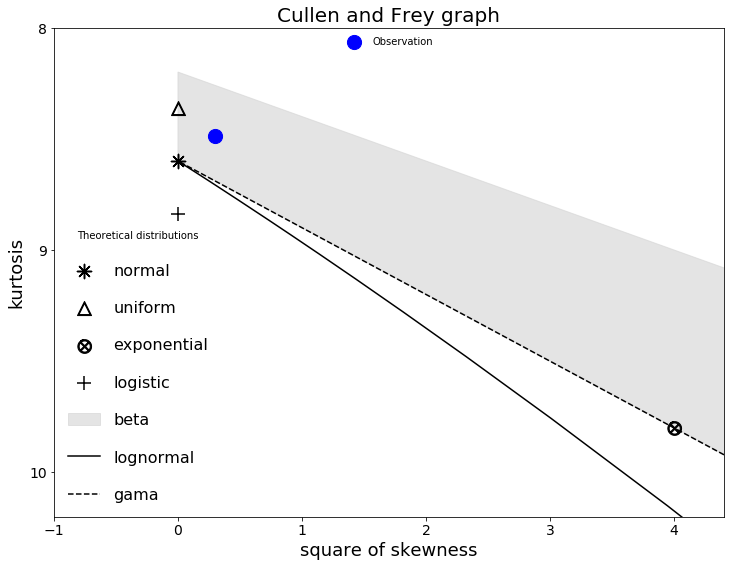

In [49]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(red_norm_list)

## Pm Noise
### Endogena

<Figure size 4400x4000 with 0 Axes>

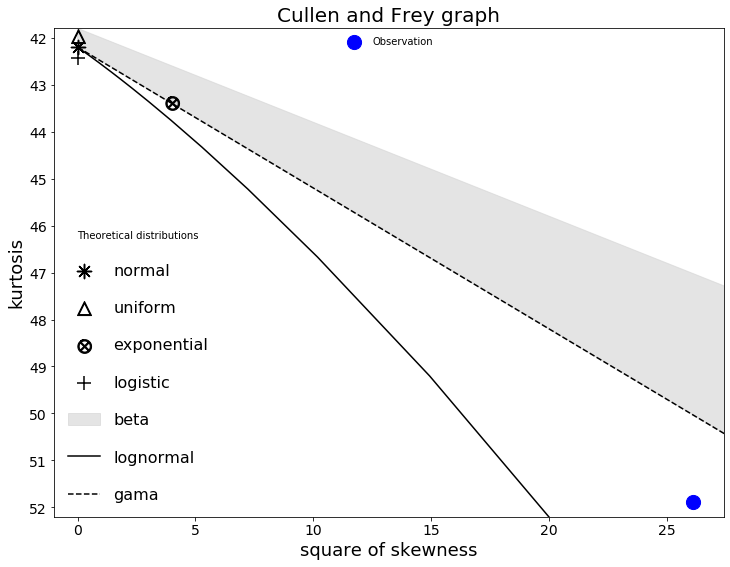

In [58]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(Endogenous_list)

### Exogena

<Figure size 4400x4000 with 0 Axes>

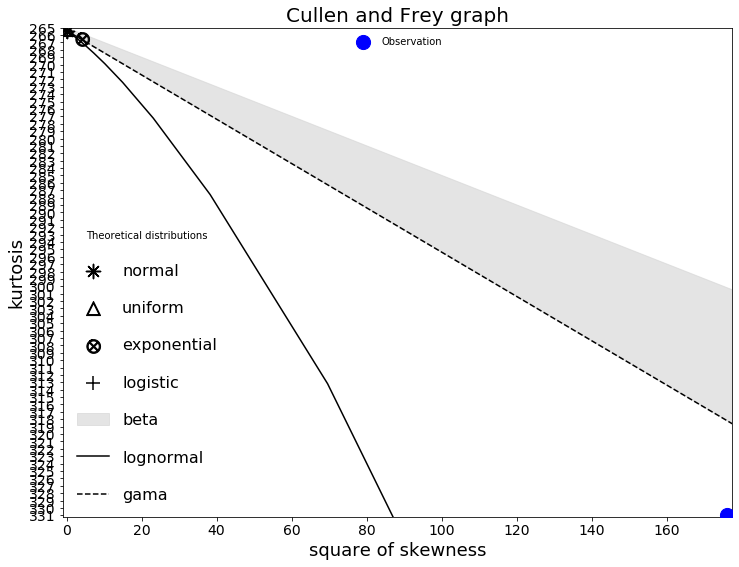

In [59]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(Exogenous_list)

### As séries endógenas e exógenas mostram uma distribuição entre as áreas log-normal e gama.

# Mostrando histogramas

## Pm Noise

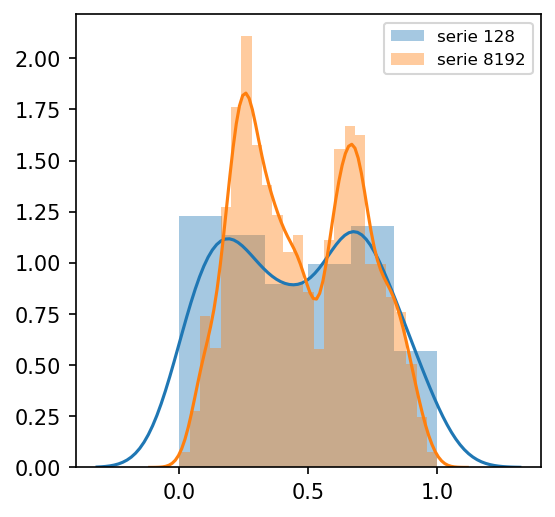

In [8]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(serie_128_norm,label='serie 128')
sns.distplot(serie_8192_norm,label='serie 8192')
plt.legend(fontsize=8)

## Color Noise

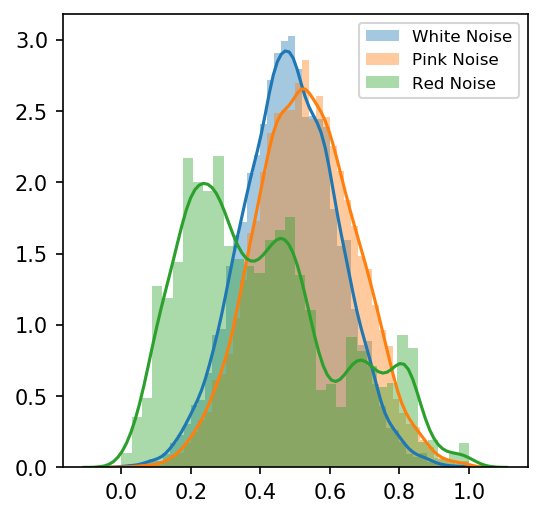

In [9]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(white_norm,label='White Noise')
sns.distplot(pink_norm,label='Pink Noise')
sns.distplot(red_norm,label='Red Noise')
plt.legend(fontsize=8)

## Endogeno e Exogeno

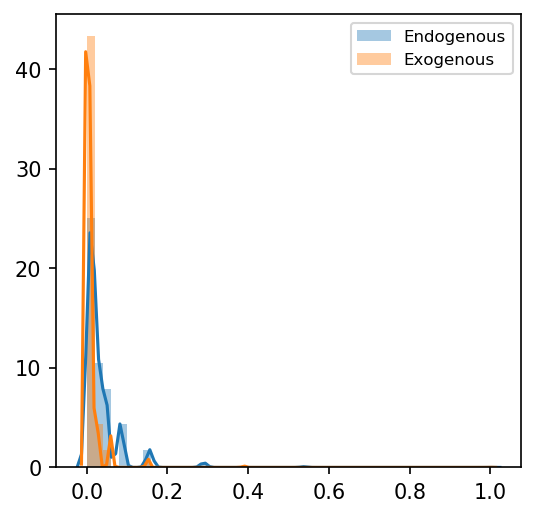

In [10]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Endogenous_norm,label='Endogenous')
sns.distplot(Exogenous_norm,label='Exogenous')
plt.legend(fontsize=8)

## Modulo Fitter
### Com este modulo pode-se encontrar a distribuicao que se ajusta melhor na data

## Noise
### Noise 128

Fitted lognorm distribution with error=79.76395333137219)
Fitted uniform distribution with error=101.50040300080592)
Fitted beta distribution with error=79.00584861161036)
Fitted gamma distribution with error=80.41224819264542)
Fitted norm distribution with error=79.67109129987335)


,sumsquare_error,aic,bic,kl_div
beta,79.005849,43.918273,-40.905733,inf
norm,79.671091,61.414689,-49.529222,inf
lognorm,79.763953,64.112657,-44.537094,inf
gamma,80.412248,63.644878,-43.509053,inf
uniform,101.500403,4.000000,-18.775414,inf


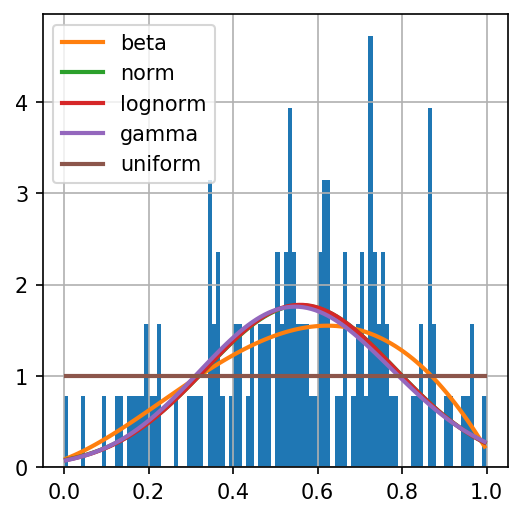

In [26]:
f = Fitter(serie_128_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Noise 512

Fitted lognorm distribution with error=40.44509551351841)
Fitted uniform distribution with error=79.4187369074108)
Fitted beta distribution with error=39.889799547672446)
Fitted gamma distribution with error=39.53275002148683)
Fitted norm distribution with error=51.8316707265709)


,sumsquare_error,aic,bic,kl_div
gamma,39.532750,81.319374,-1289.062607,inf
beta,39.889800,72.670977,-1278.231735,inf
lognorm,40.445096,87.843307,-1277.403659,inf
norm,51.831671,99.872806,-1156.883423,inf
uniform,79.418737,4.000000,-938.822883,inf


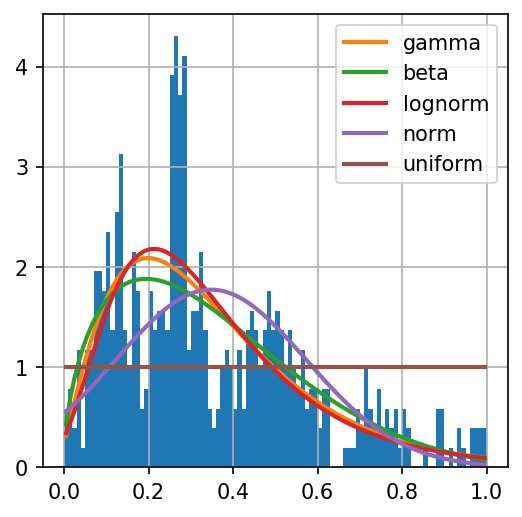

In [46]:
f = Fitter(serie_512_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Noise 2048

Fitted lognorm distribution with error=7.58254531779726)
Fitted uniform distribution with error=72.404288187057)
Fitted beta distribution with error=7.644492566474189)
Fitted gamma distribution with error=7.617751278015545)
Fitted norm distribution with error=12.217126781881603)


,sumsquare_error,aic,bic,kl_div
lognorm,7.582545,121.953098,-11436.810143,inf
gamma,7.617751,122.896188,-11427.327863,inf
beta,7.644493,125.105920,-11412.530545,inf
norm,12.217127,120.558596,-10468.036020,inf
uniform,72.404288,4.000000,-6825.549514,inf


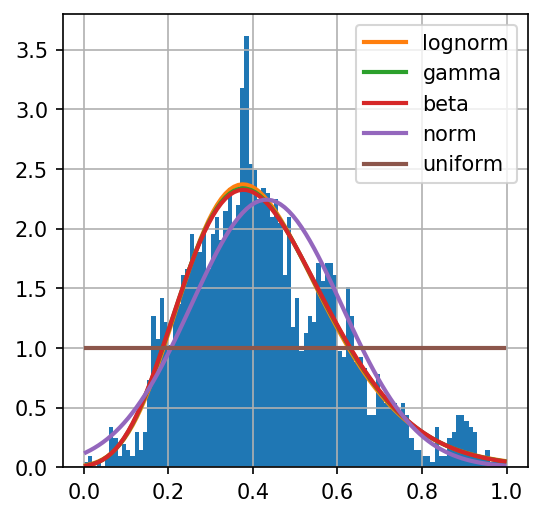

In [43]:
f = Fitter(serie_2048_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Noise 8192

Fitted lognorm distribution with error=49.85961257371262)
Fitted uniform distribution with error=67.83147428994317)
Fitted beta distribution with error=41.10497285243292)
Fitted gamma distribution with error=45.92362401891713)
Fitted norm distribution with error=49.43734714704808)


,sumsquare_error,aic,bic,kl_div
beta,41.104973,58.605479,-43332.534599,0.251317
gamma,45.923624,72.320803,-42433.568445,0.235458
norm,49.437347,77.193769,-41838.685601,0.276130
lognorm,49.859613,71.765384,-41760.009093,0.248603
uniform,67.831474,4.000000,-39247.707203,0.554622


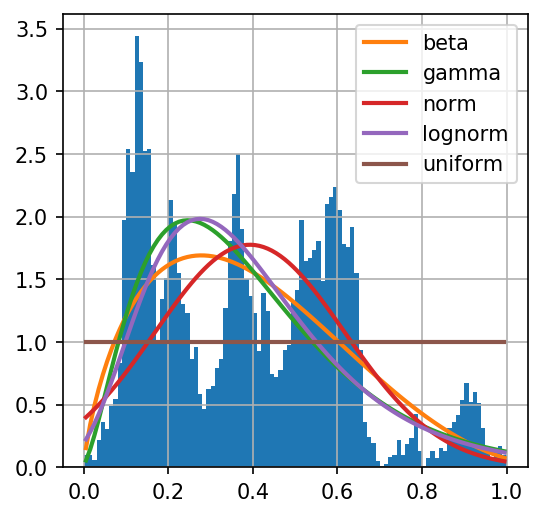

In [35]:
f = Fitter(serie_8192_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

## Color Noise
### White Noise

Fitted lognorm distribution with error=1.60552508947216)
Fitted uniform distribution with error=106.30538463592531)
Fitted beta distribution with error=1.5954090942393118)
Fitted gamma distribution with error=1.5963490295381473)
Fitted norm distribution with error=1.5955835943441008)


,sumsquare_error,aic,bic,kl_div
beta,1.595409,237.488165,-69954.627981,inf
norm,1.595584,232.112225,-69971.753845,inf
gamma,1.596349,233.643595,-69958.813999,inf
lognorm,1.605525,232.577264,-69911.859942,inf
uniform,106.305385,4.000000,-35572.920141,inf


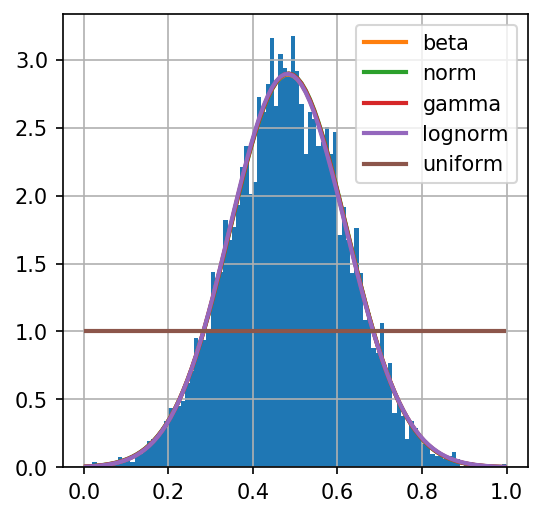

In [50]:
f = Fitter(white_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Pink Noise

Fitted lognorm distribution with error=0.9963649105316359)
Fitted uniform distribution with error=93.86351108551025)
Fitted beta distribution with error=0.9090147723882716)
Fitted gamma distribution with error=0.9980786345595033)
Fitted norm distribution with error=1.0783400010252429)


,sumsquare_error,aic,bic,kl_div
beta,0.909015,226.992657,-74562.825592,inf
lognorm,0.996365,209.745104,-73820.202309,inf
gamma,0.998079,209.625650,-73806.124367,inf
norm,1.078340,203.820378,-73181.516552,inf
uniform,93.863511,4.000000,-36592.612966,inf


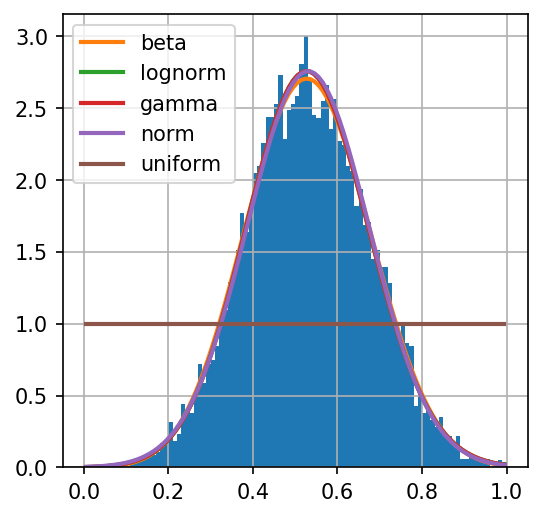

In [51]:
f = Fitter(pink_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Red Noise

Fitted lognorm distribution with error=10.343488600915126)
Fitted uniform distribution with error=42.35734939575197)
Fitted beta distribution with error=10.203689701633323)
Fitted gamma distribution with error=9.321798878455013)
Fitted norm distribution with error=19.145800823596883)


,sumsquare_error,aic,bic,kl_div
gamma,9.321799,75.671063,-55502.912139,0.053614
beta,10.203690,65.064801,-54753.395482,0.059179
lognorm,10.343489,76.765137,-54650.931210,0.057906
norm,19.145801,77.144627,-49615.912991,0.103108
uniform,42.357349,4.000000,-43110.985497,0.361568


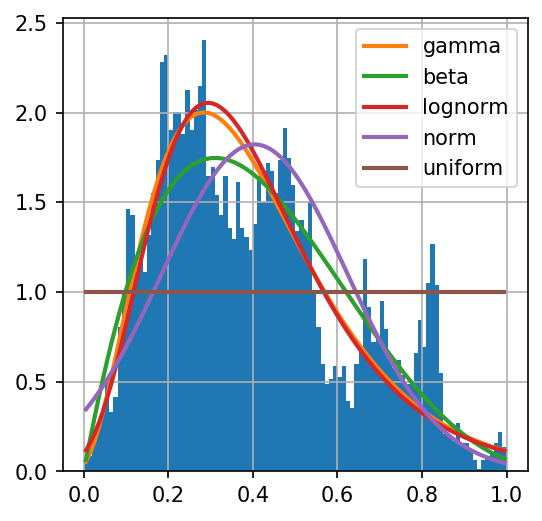

In [57]:
f = Fitter(red_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

## Pm Noise
### Endogena

Fitted lognorm distribution with error=403.64554002439155)
Fitted uniform distribution with error=1957.754397392273)
Fitted beta distribution with error=353.55769947934584)
Fitted gamma distribution with error=399.0744066508478)
Fitted norm distribution with error=1129.3500190152477)


,sumsquare_error,aic,bic,kl_div
beta,353.557699,2909.138358,-25710.319958,inf
gamma,399.074407,1485.214459,-24727.269949,inf
lognorm,403.645540,815.125089,-24633.969341,inf
norm,1129.350019,12966.298004,-16214.555652,inf
uniform,1957.754397,4.000000,-11707.679027,inf


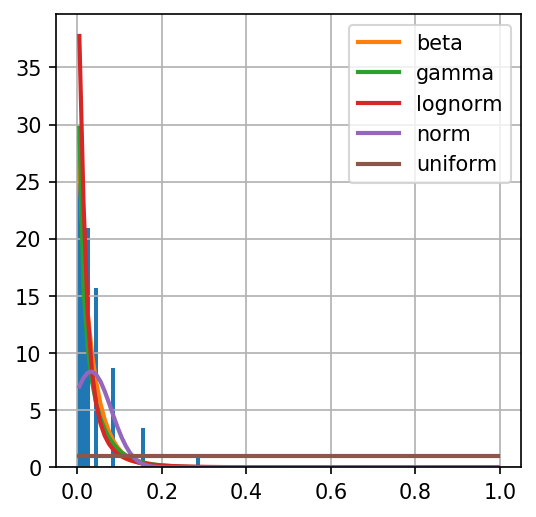

In [63]:
f = Fitter(Endogenous_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()

### Exogena

Fitted lognorm distribution with error=2172.3444726225407)
Fitted uniform distribution with error=7498.85847568512)
Fitted beta distribution with error=2199.1572699789367)
Fitted gamma distribution with error=5295.361287542551)
Fitted norm distribution with error=5479.266847521505)


,sumsquare_error,aic,bic,kl_div
lognorm,2172.344473,1035.293152,-10846.627322,inf
beta,2199.157270,5892.717503,-10737.123167,inf
gamma,5295.361288,1597.838677,-3547.356895,inf
norm,5479.266848,46834.229499,-3276.692138,inf
uniform,7498.858476,4.000000,-706.210468,inf


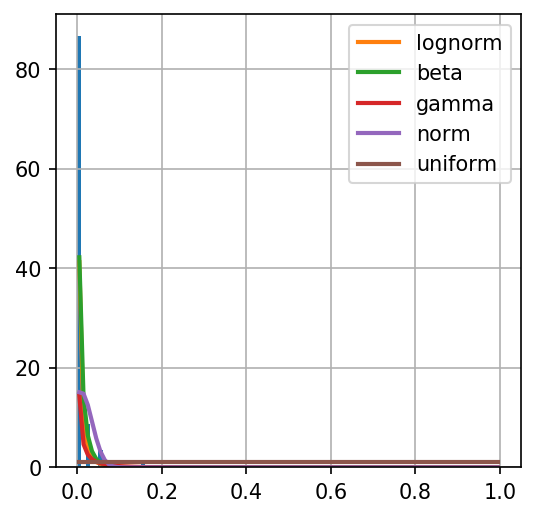

In [72]:
f = Fitter(Exogenous_norm, distributions=['lognorm','uniform','beta','gamma','norm'])
f.fit()
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()